In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hyperspy.api as hs
from scipy import ndimage
import os
from ProcessingFunctions import rotate_flip_crop_image

In [2]:
#%matplotlib inline # bruk qt5 for å poppe den i eget vindu
%matplotlib qt5
#%matplotlib widget

In [3]:
folder = '20241016_FA722_fresnel'
file_name = '002_dosetest1_xtilt0_ytilt0_x5000.dm3'
file_path = os.path.join(folder, file_name)

In [4]:
s = hs.load(file_path)

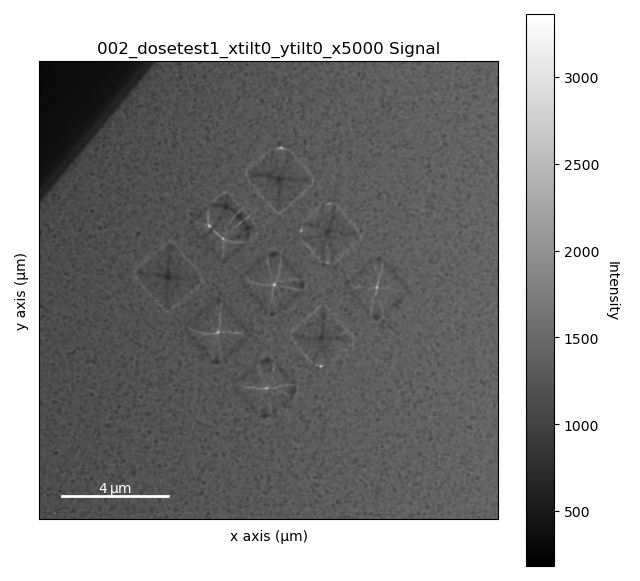

In [209]:
s.plot()

In [210]:
s.calibrate()

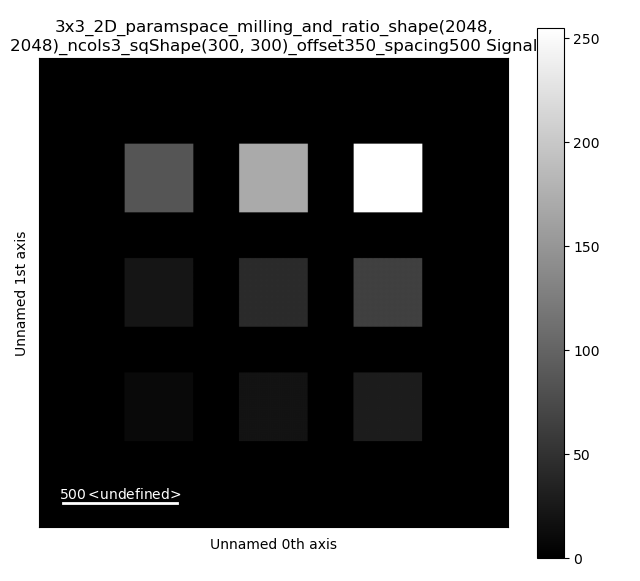

In [223]:
bitmap = hs.load('Thyra20240925/bitmaps/3x3_2D_paramspace_milling_and_ratio_shape(2048, 2048)_ncols3_sqShape(300, 300)_offset350_spacing500.bmp')
bitmap.plot()
# husk i TEMen flippes bi†mapet.

In [5]:
bildedata = ndimage.rotate(s.data, -42) # rotere bildet
bildedata_c = bildedata[838:2038,912:2012]

In [6]:
s2 = hs.load('20241016_FA722_fresnel/010_dosetest2_xtilt0_ytilt0_x2000.dm3')
s3 = hs.load('20241016_FA722_fresnel/011_dosetest3_xtilt0_ytilt0_x2000.dm3')
bildedata2 = ndimage.rotate(s2.data, -42) # rotere bildet
bildedata3 = ndimage.rotate(s3.data, -42) # rotere bildet
bildedata2_c = bildedata2[1000:2200, 900:2100]
bildedata3_c = bildedata3[1000:2200, 800:2000]
s3.plot()

In [18]:
s.axes_manager

Signal axis name,size,,offset,scale,units
x,2048,,-0.0,0.008475196547806263,µm
y,2048,,-0.0,0.008475196547806263,µm


In [19]:
s2.axes_manager

Signal axis name,size,,offset,scale,units
x,2048,,-0.0,0.02163691446185112,µm
y,2048,,-0.0,0.02163691446185112,µm


In [42]:
fig, ax = plt.subplots(1,3)

In [31]:
# cax = ax.imshow(bildedata3_c, extent = s.axes_manager.signal_extent, cmap='RdYlBu_r')
# endre kontrast
# cax.set_clim(vmin=0, vmax=1470000)
# ax.get_clim()

In [1]:
import matplotlib.patheffects as patheffects

ax[0].imshow(bildedata_c, extent = s.axes_manager.signal_extent, cmap='RdYlBu_r') 
ax[1].imshow(bildedata2_c, extent = s.axes_manager.signal_extent, cmap='RdYlBu_r')
ax[2].imshow(bildedata3_c, extent = s.axes_manager.signal_extent, cmap='RdYlBu_r')

#Fjerne akse-tall
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

#Annotere
path_effects = [patheffects.withStroke(linewidth=3, foreground='white', capstyle="round")]
ax[0].annotate('2Da', (0.05, 0.9), xycoords='axes fraction', fontsize = 7, color = 'black', path_effects=path_effects)
ax[1].annotate('2Db', (0.05, 0.9), xycoords='axes fraction', fontsize = 7, color = 'black', path_effects=path_effects)
ax[2].annotate('2Dc', (0.05, 0.9), xycoords='axes fraction', fontsize = 7, color = 'black', path_effects=path_effects)

#ax[0].annotate('10x10um, 9.7pA, z=0.10nm(3sec), dt=500ns', (0.05, 0.9), xycoords='axes fraction', fontsize = 7, color = 'black', path_effects=path_effects)
#ax[1].annotate('20x20um, 1.5pA, z=0.05nm(3sec), dt=500ns', (0.05, 0.9), xycoords='axes fraction', fontsize = 7, color = 'black', path_effects=path_effects)
#ax[2].annotate('20x20um, 1.5pA, z=0.02nm(1sec), dt=500ns', (0.05, 0.9), xycoords='axes fraction', fontsize = 7, color = 'black', path_effects=path_effects)

NameError: name 'ax' is not defined

In [44]:
fig.subplots_adjust(wspace = 0, hspace=0.01)
fig.set_figwidth(12)
fig.set_figheight(5)

In [40]:
#Skalebar
'''
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patheffects as patheffects
fontprops = fm.FontProperties(size=18)

scalebar_kwargs = {'size': 4, 'label': '4 um', 'loc': 4, 'frameon': False, 'color': 'white', 'size_vertical': 0.2, 'label_top': False, 'fontproperties': fontprops}
scalebar_haadf = AnchoredSizeBar(transform=ax.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar_haadf.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax.add_artist(scalebar_haadf)
'''


'\nfrom mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar\nimport matplotlib.font_manager as fm\nimport matplotlib.patheffects as patheffects\nfontprops = fm.FontProperties(size=18)\n\nscalebar_kwargs = {\'size\': 4, \'label\': \'4 um\', \'loc\': 4, \'frameon\': False, \'color\': \'white\', \'size_vertical\': 0.2, \'label_top\': False, \'fontproperties\': fontprops}\nscalebar_haadf = AnchoredSizeBar(transform=ax.transData, **scalebar_kwargs)\n# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese\nscalebar_haadf.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground=\'black\', capstyle="round")])\nax.add_artist(scalebar_haadf)\n'

In [45]:
fig.show()

### Nå for de andre

In [48]:
fig.savefig("20241016FA722_Ga-implanted_magnetic_dosetest.png", bbox_inches='tight', pad_inches=0, dpi=300) 